In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon, kruskal

In [19]:
df_gw = pd.read_csv('data/gw-data/gw_small_20250616_124601.csv')
df_qaoa = pd.read_csv('data/qaoa-data/qaoa_20250616-154534.csv')
df_solver = pd.read_csv('data/gur-data/gur_20250615_151121.csv')
df_brute = pd.read_csv('data/bf-data/bf_20250616_093511.csv') 

In [20]:
df_gw['Optimal'] = df_brute['Cut Value']
df_qaoa['Optimal'] = df_brute['Cut Value']

df_gw['Gap'] = (df_gw['Optimal'] - df_gw['Cut Value']) / df_gw['Optimal']
df_qaoa['Gap'] = (df_qaoa['Optimal'] - df_qaoa['Cut Value']) / df_qaoa['Optimal']

In [21]:
def summarize(df, label):
    print(f"\n{label} summary:")
    print(df.groupby('Graph Size')['Cut Value'].agg(['mean', 'std', 'min', 'max']))
    if 'Gap' in df:
        print(df.groupby('Graph Size')['Gap'].agg(['mean', 'std', 'min', 'max']))

summarize(df_gw, "Goemans-Williamson")
summarize(df_qaoa, "QAOA")
summarize(df_solver, "Solver")
summarize(df_brute, "Brute Force")


Goemans-Williamson summary:
                  mean        std    min    max
Graph Size                                     
8            57.617561  11.491566   12.0  108.0
10           89.053499  14.103009   32.0  146.0
12          126.711952  16.670177   62.0  202.0
14          170.371499  19.129056   83.0  255.0
16          219.949796  21.437362  131.0  303.0
18          275.815331  24.053061  175.0  375.0
                mean       std        min       max
Graph Size                                         
8          -0.019400  0.206903  -2.111111  0.660714
10         -0.617162  0.457138  -6.000000  0.600000
12         -1.297963  0.615803  -9.846154  0.220930
14         -2.094316  0.804515 -12.750000 -0.106667
16         -2.991353  1.010738 -22.363636 -0.597701
18         -4.007337  1.248230 -24.250000 -1.247191

QAOA summary:
                 mean       std        min        max
Graph Size                                           
8            7.418702  1.611689   3.881343  10.0

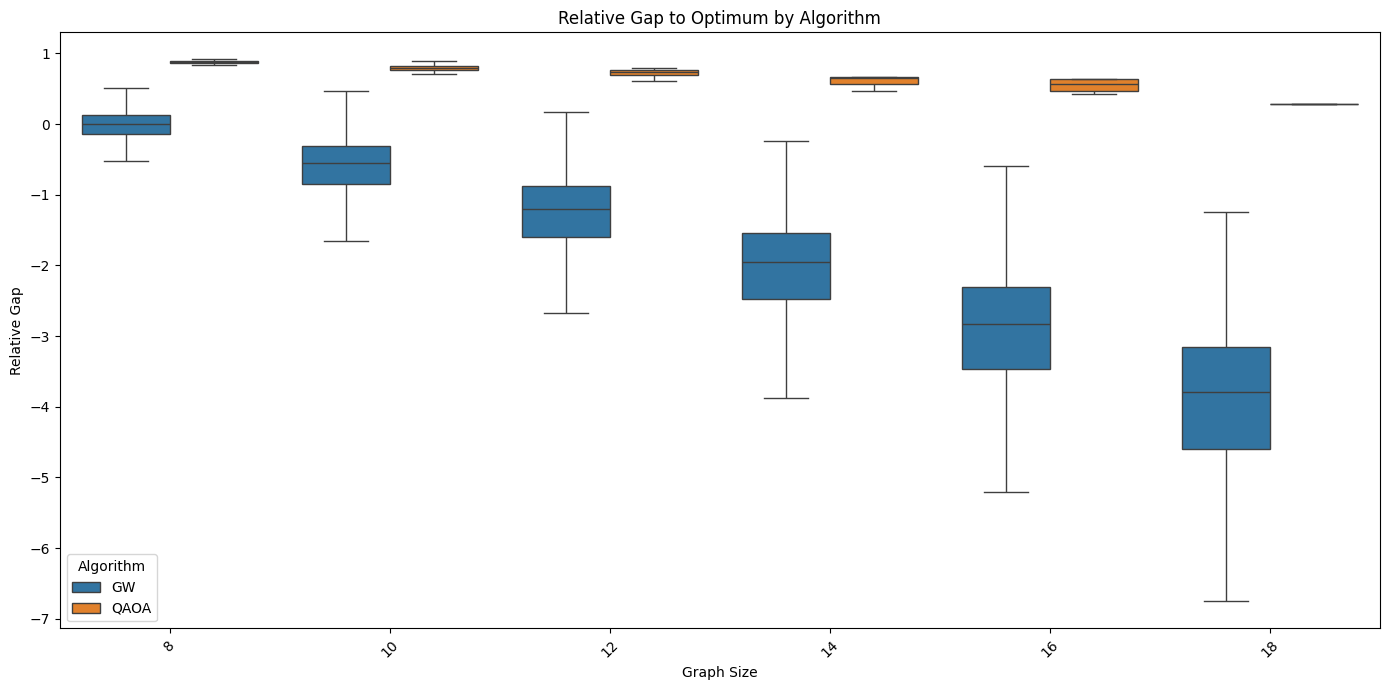

In [ ]:
for size in df_gw['Graph Size'].unique():
    gw_vals = df_gw[df_gw['Graph Size'] == size]['Cut Value']
    qaoa_vals = df_qaoa[df_qaoa['Graph Size'] == size]['Cut Value']
    if len(gw_vals) == len(qaoa_vals):
        stat, p = wilcoxon(gw_vals, qaoa_vals)
        print(f"Wilcoxon GW vs QAOA for size {size}: p-value = {p:.4f}")

plt.figure(figsize=(14, 7))
sns.boxplot(
    x='Graph Size', y='Gap', hue='Alg',
    data=pd.concat([df_gw.assign(Alg='GW'), df_qaoa.assign(Alg='QAOA')]),
    showfliers=False
)

plt.title('Relative Gap to Optimum by Algorithm')
plt.ylabel('Relative Gap')
plt.xlabel('Graph Size')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()